In [1]:
import os
import glob
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# users = list of all users
# subs  = set of all subs (set to avoid duplicates)
# activity = list of dictionary (key = sub , value = activity). ith list for ith user in users list

users = []
activity = []
subs = set()
for userDir in list(glob.iglob("users/*")):
    try:
        with open(userDir+"/subreddits30.csv") as file:
            userSubs = file.read().split('\n')
            tempDir = {}
            for row in userSubs[1:-1]:
                sub = row.split(',')[0]
                score =  row.split(',')[1]
                subs.add(sub)
                tempDir[sub] = score
            activity.append(tempDir)
            users.append(userDir.split('/')[-1])
    except:
        pass
subs = list(subs)
print(len(users))
print(len(subs))
print(len(activity))

512
3395
512


In [3]:
# matrix = row is user, column is sub, value is activity. Sparse with many zeros

matrix = np.zeros((len(users),len(subs)))
for idx,act in enumerate(activity):
    for k,v in act.items():
        matrix[idx][subs.index(k)] = v
print(matrix.shape)

(512, 3395)


In [4]:
# trying to cap max activity value
# min max normalization

# matrix[matrix>100] = 100
# matrix = matrix/np.max(matrix,axis=1)[:,None]

(512, 3395)
(512, 512)
(512,)
(512, 3395)


<IPython.core.display.Javascript object>


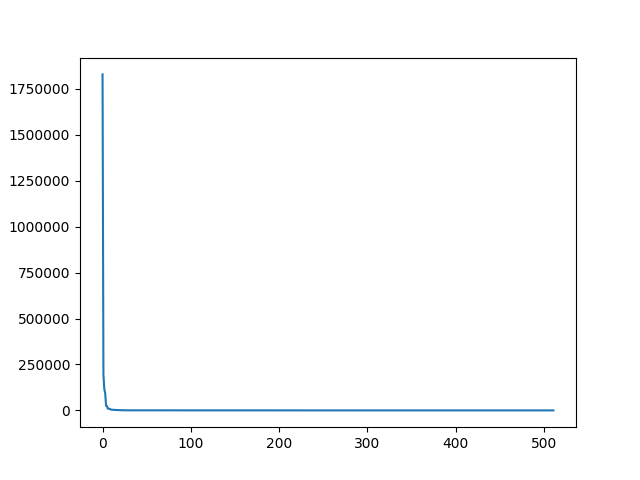

In [5]:
# SVD to get low rank structure. VT rows represent sub vectore. U rows represent users. 
U, S, VT = np.linalg.svd(matrix,full_matrices=False)
matrixReconstruct = (U * S) @ VT
print(matrix.shape)
print(U.shape)
print(S.shape)
print(VT.shape)
plt.plot(S)

In [7]:
# remove less relevant dimnsions and preprocces to make row order for faster calculation
U = U[:,:100]
V = VT[:100]
V = V.T.copy()
matrixT = matrix.T.copy()
matrixReconstructT = matrixReconstruct.T.copy()
usersnp = np.array(users)
subsnp = np.array(subs)
random_user = np.random.randint(U.shape[0])
random_sub = np.random.randint(V.shape[0])

In [8]:
# pick random sub and find 10 closest subs (including that sub) using rank approximation
close_subs = np.argsort(np.sum((V-V[random_sub])**2,axis=1))[:10]
print(subsnp[random_sub])
print(subsnp[close_subs])

ukpolitics
['ukpolitics' 'LabourUK' 'marvelstudios' 'MarvelStudiosSpoilers'
 'HouseOfCards' 'syriancivilwar' 'coaxedintoasnafu' 'ufl'
 'LiveFromNewYork' 'suits']


In [9]:
# pick random sub and find 10 closest subs (including that sub) using original matrix
close_subs = np.argsort(np.sum((matrixT-matrixT[random_sub])**2,axis=1))[:10]
print(subsnp[random_sub])
print(subsnp[close_subs])

ukpolitics
['ukpolitics' 'LabourUK' 'marvelstudios' 'MarvelStudiosSpoilers'
 'HouseOfCards' 'syriancivilwar' 'television' 'coaxedintoasnafu' 'ufl'
 'TwentyFour']


In [10]:
# pick random sub and find 10 closest subs (including that sub) using reconstructed matrix
close_subs = np.argsort(np.sum((matrixReconstructT-matrixReconstructT[random_sub])**2,axis=1))[:10]
print(subsnp[random_sub])
print(subsnp[close_subs])

ukpolitics
['ukpolitics' 'LabourUK' 'marvelstudios' 'MarvelStudiosSpoilers'
 'HouseOfCards' 'syriancivilwar' 'television' 'coaxedintoasnafu' 'ufl'
 'suits']


In [11]:
# pick random user and find 10 closest user( including that user) using rank approximation
close_users = np.argsort(np.sum((U-U[random_user])**2,axis=1))[:10]
print(usersnp[random_user])
print(usersnp[close_users])

Fish_EyeMouth
['Fish_EyeMouth' 'Maedhre' 'CJnella91' 'jonyprepperisrael' 'ashamedseesaw'
 'Montiexx' 'purpleandorange1522' 'muhy_men' 'Baconboi212121' 'DogfaceZed']


In [12]:
# pick random user and find 10 closest users (including that user) using original matrix
close_users = np.argsort(np.sum((matrix-matrix[random_user])**2,axis=1))[:10]
print(usersnp[random_user])
print(usersnp[close_users])

Fish_EyeMouth
['Fish_EyeMouth' 'Maedhre' 'ashamedseesaw' 'jonyprepperisrael' 'Montiexx'
 'Robotman6900' 'CJnella91' 'Waterkoker' 'Baconboi212121' 'DogfaceZed']


In [13]:
# pick random user and find 10 closest users (including that user) using reconstructed matrix
close_users = np.argsort(np.sum((matrixReconstruct-matrixReconstruct[random_user])**2,axis=1))[:10]
print(usersnp[random_user])
print(usersnp[close_users])

Fish_EyeMouth
['Fish_EyeMouth' 'Maedhre' 'ashamedseesaw' 'jonyprepperisrael' 'Montiexx'
 'Robotman6900' 'CJnella91' 'Waterkoker' 'Baconboi212121' 'DogfaceZed']
